## Gensim LDA
gensim, sklearn, maplotlib, pyLDAvis 등이 필요합니다. 코드는 다음과 같이 짰습니다.

1. 데이터 불러오기(Konlpy로 했던 전처리 생략)
2. sklearn의 CV로 term freq matrix 생성
3. perplexity로 components 개수 찾기
4. LDA모델 생성 및 시각화

In [1]:
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel 
from gensim.matutils import Sparse2Corpus
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim as gensimvis
from pprint import pprint
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning) 
pyLDAvis.enable_notebook()

C:\Users\yj\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\yj\Anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [2]:
file_dir = 'VR_konlpy.csv'
df = pd.read_csv(file_dir, index_col=0, engine='python', encoding ='utf-8')
df.head()

,num,patentNumber,patentTitle,nouns,ipcInfo
0,0,10-2018-0124834,가상현실 서버 장치,발명 서버 메인 메인보드 보드 증가 처리 용량 확장 랙타입 타입 본체 구성 공간 차...,"H05K-007/14,H05K-007/20"
0,1,10-2017-0081092,가상현실 실시간 모션 시뮬레이터,베이스 상부 설치 발판 사이 회전 가능 회전모듈 모듈 주변 위치 복수 지지 지지기둥...,"G09B-009/00,A61B-005/11,G06Q-050/10"
0,2,10-2009-0064112,가상현실 낚시게임장치,발명 가상현실 낚시 낚시게임장치 게임 장치 영상 영상표시기기 표시 기기 상기 제어 ...,"A63F-013/06,A63F-013/04,A63F-009/30"
0,3,10-2005-0035716,가상현실 여행 방법,발명 가상공간 특정 지역 문화 문화유적지 유적지 박물관 관광지 입력 대상 건축물 유...,G06Q-099/00
0,4,10-2017-0144928,가상현실 휘트니스 시스템,발명 구면 구면함몰부 함몰부 제공 바닥 바닥유닛 유닛 상기 위치 사용자 착용 움직임...,"A63B-071/06,A61B-005/00,A61B-005/053,A61B-005/..."


In [3]:
# 불용어 사전
with open('Stops.txt', 'r') as f:
    line = f.readline()
    stop = line.split(", ")

# CV
cntVec = CountVectorizer(min_df=2, max_df= 0.3, stop_words=stop)
nouns = df['nouns'].values 
title = df['patentTitle'].values
cntVec.fit(nouns)
vec_matrix = cntVec.transform(nouns)
feat = cntVec.get_feature_names()
corpus = Sparse2Corpus(vec_matrix, documents_columns=False)
dictionary = Dictionary([feat])

C:\Users\yj\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['청소', '표현'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [4]:
nouns

array(['발명 서버 메인 메인보드 보드 증가 처리 용량 확장 랙타입 타입 본체 구성 공간 차지 전원 전원선 케이블 장해 축소 단시간 설치 설치작업 작업 수행 내부 선반 인출 교체 고장 수리 편리 하고 흔들림 안전 수납 함체 흡입 외기 신속 원활 흐름 유지 냉각 기능 향상 내부면 폴리에틸렌 기반 원료 발포제 배합 발포 발포타입 혼합물 이용 절연층 연층 미세 다공성 폴리 폴리올레핀 올레핀 합성 합성수지 수지 코팅 전기 사고 화재 발생 가능성 가상현실 장치 구성은 형성 상기 전방 개폐 도어 양측 브라켓 체결 체결구멍 구멍 받침 받침판과 판과 받침판 고정 고정볼트 볼트 연결 세로 프레임 하방 요입 안내 요홈부에 부에 돌기 슬라이딩 부재 상부 절곡 탄력성 끼움 끼움부 후방 위치 가로 방향 덕트 선회 측면 공기 배출 배출구멍 흡입모듈 모듈 포함',
       '베이스 상부 설치 발판 사이 회전 가능 회전모듈 모듈 주변 위치 복수 지지 지지기둥 기둥 승강 승강모듈 사용자 허리 허리위치 추적 1트랙킹모듈 트랙 연결 연결부 무릎 무릎의 모션 트랙킹 2트랙킹모듈 검출 사용 사용자의 자의 모션정보 정보 근거 구동 제어 제어모듈 포함 특징 가상현실 실시간 시뮬레이터 개시',
       '발명 가상현실 낚시 낚시게임장치 게임 장치 영상 영상표시기기 표시 기기 상기 제어 제어봉 움직임 감지 움직임정보 정보 제어장치부로 부로 출력 위치 위치감지부와 부와 사용자 가상 낚시게임 구현 형태 형성 움직임상태 상태 위치감지부 감지부 인식 신호 송출 제어봉과 봉과 컨텐츠 다양 어종 랜덤 낚시터 낚시터영상 화면 하고 제어봉의 봉의 동작 낚시줄 변화 낚시바늘 바늘 부근 존재 물고기 판단 상세 상세정보 제어장치 제어장치부 포함 구성 특징 표현 종류 자유 유영 가정 가정내 설치 화면상 이용 획득 있음 웹서버 저장 접속 자신 반복적 학습 효과 기대',
       ...,
       '발명 건설 건설공사 공사 시설물 부위 구조물 3차원 차원 형태 구성 공사경과일정별 경과 일정별 완성 완성상태 상

C:\Users\yj\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


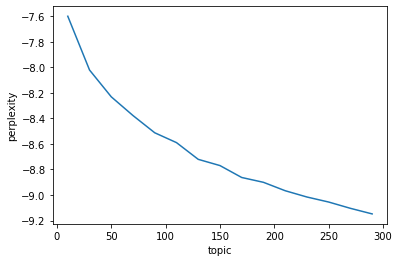

In [26]:
com_nums = [x for x in range(10,300,20)]
perplexity_li= []
for i in com_nums:
    lda = LdaModel(corpus,i,dictionary,iterations=10,alpha='auto',random_state=0,passes=10)
    perp = lda.log_perplexity(corpus)
    perplexity_li.append(perp)
    
plt.plot(com_nums, perplexity_li)
plt.xlabel("topic")
plt.ylabel("perplexity")
plt.show()

In [27]:
# perplexity가 별로지만 그냥 적당히 숫자를 부여하겠습니다.
K = 50
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=K, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [28]:
pprint(lda_model.print_topics())

[(7,
  '0.086*"모니터" + 0.034*"다리" + 0.030*"가상현실장치" + 0.022*"조작자" + 0.022*"콘트롤러" + '
  '0.021*"외주면" + 0.018*"플랫포옴" + 0.018*"상면중심" + 0.018*"공간좌표" + 0.017*"핸들"'),
 (4,
  '0.122*"로봇" + 0.062*"관절" + 0.054*"작업자" + 0.048*"수술" + 0.048*"초점" + '
  '0.023*"현실상" + 0.020*"피로도" + 0.019*"군인" + 0.019*"감각장치" + 0.019*"가상현실분야"'),
 (48,
  '0.156*"실감" + 0.127*"인터랙션" + 0.076*"플레이트" + 0.035*"매트릭스" + 0.032*"통신모듈" + '
  '0.026*"햅틱장치" + 0.023*"접안" + 0.020*"상용화" + 0.018*"송풍기" + 0.018*"특별"'),
 (47,
  '0.085*"구매" + 0.061*"아이템" + 0.044*"판매" + 0.042*"오프라인" + 0.035*"라인" + '
  '0.034*"원본" + 0.031*"진열" + 0.021*"캘리브레이션" + 0.020*"연기" + 0.019*"관측"'),
 (24,
  '0.181*"학습" + 0.059*"적외선" + 0.051*"제어장치" + 0.042*"제조" + 0.037*"화면상" + '
  '0.033*"의료분야" + 0.023*"가상정보" + 0.021*"어린이" + 0.021*"관리시스템" + 0.017*"낚시"'),
 (21,
  '0.082*"렌즈" + 0.060*"컨트롤러" + 0.059*"디스플레이" + 0.037*"헤드" + 0.026*"마운트" + '
  '0.026*"페달" + 0.026*"단축" + 0.025*"오락" + 0.024*"몸체" + 0.023*"패션"'),
 (9,
  '0.105*"안내" + 0.068*"삼차원" + 0.060*"보드" + 0.055*"카드" + 0.041*"공기"

In [29]:
for t in range(K):
    topic = [word for word, p in lda.show_topic(t)]
    print(t, ' '.join(topic))

0 로봇 마스터 슬레이브 증강 디스플레이 수술 내시경 구현부 표시부와 수술자
1 유동 기구 놀이 라이더 가상체험 게임장 공원 승부 요동 신체
2 촬영 제약 학습 공간적 현실감 콘텐츠 합성 3차원 컴퓨터 가상공간
3 오차 유압 실린더 편로드 편로 변수 추정 재현 재현기의 매개
4 컨트롤러 구동체 맵핑 클라이언트 3차원 터미널 갱신 워크 공유 지형
5 정합 실사 증강 모바일 검색 네트워크 소셜 각도 재생 카메라
6 카메라 촬영 3차원 배경 변환 가상공간 디스플레이 재생 컨텐츠 스크린
7 현실세계 가상객체 실제현실 카메라 색상 보정 능력 재사용 대역폭 오디오
8 음성 가공 디스플레이 시야각 주파수역 주파수 3차원 배경 휴먼 제어력를
9 3차원 컴퓨터 디스플레이 현실감 몰입도 계산 기재 기술분야 기록매체 추적
10 화상 화상회의 평면 텍스트 음성 영상물 대화자 채팅 아바타 인물
11 컨텐츠 3차원 시청 합성 인터랙션 트랙 배터리 트랙킹 전원 영상장치
12 훈련 카메라 컨텐츠 2차원 조준점 원통형 컴퓨터 슈팅 아케이드 레이저
13 음성 증강 디스플레이 카메라 집중도 가상객체 뮤니 실제환경 재미 커뮤니케이션
14 탑승 출입문 태그 부착 전방위 실감 미디어 실감미디어 반구체 태그부착공정
15 증강 훈련 광고 온라인 공정 부품 플랜트 훈련시스템 이력 안전훈련
16 인물 콘텐츠 생체 판독 태양 인터랙티브 컴퓨터 매체 건강 정신
17 3차원 리스트 이벤트 변환 인터넷상의 가상공간 다자 노드 확장 작은
18 계산 반사 고주파 주파수 음원 함수 충격 디스플레이 3차원 2차원
19 컨텐츠 체험정보 음향정보 음향 정서 가상현실시스템 음성정보 생체 생체반응정보 정서안정
20 디스플레이 콘텐츠 재생 제공자 외부시야 발산 표현 3차원 로컬 뷰어
21 파노라마 컨텐츠 디스플레이 설정부 이미지 공동 로딩 실험자 협업 디스플레이함
22 컴퓨터 판독 매체 판독가능 증강 미팅 원격 명세서 참여자 세션
23 3차원 평면 특징점 스크린 매칭 이미지 변환 가속도 소실점 2차원
24 피드백 속도 촉각 게임

In [30]:
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
30    -0.264803 -0.012921       1        1  3.708696
36     0.076985  0.019068       2        1  3.290398
43    -0.144120 -0.004843       3        1  3.079165
38     0.023179  0.023506       4        1  3.002198
25    -0.085433 -0.017360       5        1  2.857572
34     0.080982 -0.010721       6        1  2.742498
0      0.049281  0.028200       7        1  2.626871
27     0.054073  0.027815       8        1  2.556956
19     0.051362  0.032059       9        1  2.506379
15     0.063301 -0.000495      10        1  2.478966
3     -0.149297  0.027745      11        1  2.421185
13     0.056053  0.030166      12        1  2.407641
10    -0.107780  0.031658      13        1  2.389503
11    -0.037935 -0.297981      14        1  2.256532
6      0.058214 -0.278015      15        1  2.251329
14    -0.247248 -0.011865      16        1  2.228326
42     0.055220  0.029288      17        1  2.187086
32    -0.086189  0.019539      18        1  2.178697
39    -0.118141  0.020253      19        1  2.170527
28     0.054920  0.028470      20        1  2.159515
46     0.052615  0.034666      21        1  2.077655
31    -0.024347  0.050805      22        1  1.990090
16     0.069590 -0.264203      23        1  1.966026
26     0.055456  0.052524      24        1  1.955150
2     -0.041084  0.034398      25        1  1.916360
1      0.051774  0.037015      26        1  1.872887
18    -0.113295  0.021857      27        1  1.836228
5     -0.108733 -0.029946      28        1  1.832038
23     0.043401  0.039078      29        1  1.770644
8      0.056151  0.029996      30        1  1.770422
49    -0.056996  0.011850      31        1  1.738358
12     0.059624  0.049478      32        1  1.737059
33     0.056073  0.029807      33        1  1.702503
7      0.055527  0.032210      34        1  1.664128
22     0.058893  0.030358      35        1  1.637307
20     0.053480  0.032544      36        1  1.631525
17     0.069882 -0.184022      37        1  1.594007
45     0.052266  0.029374      38        1  1.567925
21    -0.148957  0.018847      39        1  1.535917
41     0.057065  0.030727      40        1  1.486493
47     0.056710  0.030818      41        1  1.473926
40     0.057204  0.030902      42        1  1.465862
44    -0.024987  0.000756      43        1  1.401812
24     0.022409  0.017069      44        1  1.391524
37     0.022462  0.016563      45        1  1.329739
35     0.052659  0.035706      46        1  1.300089
9      0.058305  0.031639      47        1  1.276488
29    -0.019248  0.003809      48        1  1.268760
4      0.056908  0.030752      49        1  1.236230
48     0.036568  0.031055      50        1  1.072808, topic_info=     Category        Freq Term       Total  loglift  logprob
1841  Default  251.000000   증강  251.000000  30.0000  30.0000
1523  Default  162.000000  이미지  162.000000  29.0000  29.0000
1953  Default  159.000000   촬영  159.000000  28.0000  28.0000
4     Default  201.000000  3차원  201.000000  27.0000  27.0000
2004  Default  169.000000  카메라  169.000000  26.0000  26.0000
...       ...         ...  ...         ...      ...      ...
834   Topic50    1.457143   분담    2.241691   4.1041  -4.7561
293   Topic50    1.457143   구속    2.241691   4.1041  -4.7561
1187  Topic50    1.299482   실존    2.084031   4.0626  -4.8706
2008  Topic50    1.206385  카테터    1.990934   4.0339  -4.9449
2356  Topic50    1.206385   혈관    1.990934   4.0339  -4.9449

[1612 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0        38  0.929106   1인칭
1        15  0.963187   2차원
2        21  0.946198  360도
4        14  0.556774   3차원
4        15  0.169021   3차원
...     ...       ...   ...
2436      5  0.893586   휴대용
2437     43  0.738791   휴대폰
2440     47  0.877183   흔들림
2442      4  0.812157    힌지
2443     48  0.793536    힐링

[1575 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab'

In [32]:
# 결과는 html로도 저장할 수 있습니다.

path = 'LDA_visualization_result.html'
pyLDAvis.display(vis)
pyLDAvis.save_html(vis, path)